## Statistics 

Statistics is the science of collecting, organizing, presenting, analyzing, and interpreting data to help in making more
effective decisions.

➢ Statistical Analysis is implemented to manipulate, summarize and investigate data, so that useful decision-making information results are obtained.

## Types of Statistics

![alt text](../assets/Types_stats.png "Types of Statistics")

Any machine learning models that you build are only as good as the data that you provide them. The first step in understanding your data is to actually look at some raw values and calculate some basic statistics.
You Must Understand Your Data

Understanding the data that you have is critically important.

You can run techniques and algorithms on your data, but it is not until you take the time to truly understand your dataset that you can fully understand the context of the results you achieve.

Better Understanding Equals Better Results

A deeper understanding of your data will give you better results.

Taking the time to study the data you have will help you in ways that are less obvious. You build an intuition for the data and for the entities that individual records or observations represent. These can bias you towards specific techniques (for better or worse), but you can also be inspired.

For example, examine your data in detail may trigger ideas for specific techniques to investigate:

Data Cleaning. You may discover missing or corrupt data and think of various data cleaning operations to perform such as marking or removing bad data and imputing missing data.
Data Transforms. You may discover that some attributes have familiar distributions such as Gaussian or exponential giving you ideas of scaling or log or other transforms you could apply.
Data Modeling. You may notice properties of the data such as distributions or data types that suggest the use (or to not use) specific machine learning algorithms.

## Introduction to Basic Terms

➢ Variable - A characteristic about each individual element of a population/sample.

➢ Data (singular) - A value of the associated variable with one element of a population/sample. This value may be a
number, a word, or a symbol.

➢ Data (plural) - A set of values collected for the variable from each of the elements belonging to the sample.

➢ Experiment - A planned activity whose results yield a set of data.

➢ Population - The entire collection/set of individuals/objects/events of interest whose properties are to be analyzed. There are two kinds:

    • Finite
    • Infinite

➢ Sample – A portion, or part, of the population of interest

➢ Parameter - A numerical value which summarizes the entire population data.

➢ Statistics - A numerical value which summarizes the sample data.

## What comes under Descriptive Stats

![descriptive stats](../assets/descriptive_stats.png "descriptive stats")

# Descriptive Statitics

Below list of  descriptives statistics that is  recommended to look at when reviewing your dataset :

    Peek at the first few rows of your data
    Review the number of rows and columns you ave.
    Review the data types of each column
    Take a look at the class distribution (for classification problems)
    Calculate a simple 5-number summary for each column
    Review the standard deviations for each numerical column
    Check the skewness of each column, handy to see what transforms to apply
    Review the correlations between attributes

## Kinds of Variables

![](../assets/six_sigma_data_types.jpg)

In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline

plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

# from ggplot import *

import pandas as pd

## Data Description 

source : https://archive.ics.uci.edu/ml/datasets/Wine+Quality

    Relevant Information:

       The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
       For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
       Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
       are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

       These datasets can be viewed as classification or regression tasks.
       The classes are ordered and not balanced (e.g. there are munch more normal wines than
       excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
       or poor wines. Also, we are not sure if all input variables are relevant. So
       it could be interesting to test feature selection methods. 

    Number of Instances: red wine - 1599; white wine - 4898. 

    Number of Attributes: 11 + output attribute

    Note: several of the attributes may be correlated, thus it makes sense to apply some sort of feature selection.

    Attribute information:

           For more information, read [Cortez et al., 2009].

           Input variables (based on physicochemical tests):
           1 - fixed acidity
           2 - volatile acidity
           3 - citric acid
           4 - residual sugar
           5 - chlorides
           6 - free sulfur dioxide
           7 - total sulfur dioxide
           8 - density
           9 - pH
           10 - sulphates
           11 - alcohol
           Output variable (based on sensory data): 
           12 - quality (score between 0 and 10)

    Missing Attribute Values: None

In [2]:
red_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=";")

In [3]:
white_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",sep=";")

In [4]:
red_wine["color"] = "R"

In [5]:
white_wine["color"] = "W"

In [6]:
print("white mean = ",white_wine["quality"].mean())
print("red mean =",red_wine["quality"].mean())

white mean =  5.87790935075541
red mean = 5.6360225140712945


In [7]:
all_wine = pd.concat([red_wine,white_wine],axis=0,sort=True)

In [8]:
all_wine.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [9]:
all_wine.describe().rename_axis('metric').reset_index()

,metric,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
1,mean,10.491801,0.056034,0.318633,0.994697,7.215307,30.525319,3.218501,5.818378,5.443235,0.531268,115.744574,0.339666
2,std,1.192712,0.035034,0.145318,0.002999,1.296434,17.749400,0.160787,0.873255,4.757804,0.148806,56.521855,0.164636
3,min,8.000000,0.009000,0.000000,0.987110,3.800000,1.000000,2.720000,3.000000,0.600000,0.220000,6.000000,0.080000
4,25%,9.500000,0.038000,0.250000,0.992340,6.400000,17.000000,3.110000,5.000000,1.800000,0.430000,77.000000,0.230000
5,50%,10.300000,0.047000,0.310000,0.994890,7.000000,29.000000,3.210000,6.000000,3.000000,0.510000,118.000000,0.290000
6,75%,11.300000,0.065000,0.390000,0.996990,7.700000,41.000000,3.320000,6.000000,8.100000,0.600000,156.000000,0.400000
7,max,14.900000,0.611000,1.660000,1.038980,15.900000,289.000000,4.010000,9.000000,65.800000,2.000000,440.000000,1.580000


## checking stats as per groups 

In [10]:
summary = all_wine.groupby('color').apply(lambda x : x.describe().rename_axis('metric').reset_index()).reset_index(level=0)

print(summary)

  color metric      alcohol    chlorides  citric_acid      density  \
0     R  count  1599.000000  1599.000000  1599.000000  1599.000000   
1     R   mean    10.422983     0.087467     0.270976     0.996747   
2     R    std     1.065668     0.047065     0.194801     0.001887   
3     R    min     8.400000     0.012000     0.000000     0.990070   
4     R    25%     9.500000     0.070000     0.090000     0.995600   
5     R    50%    10.200000     0.079000     0.260000     0.996750   
6     R    75%    11.100000     0.090000     0.420000     0.997835   
7     R    max    14.900000     0.611000     1.000000     1.003690   
0     W  count  4898.000000  4898.000000  4898.000000  4898.000000   
1     W   mean    10.514267     0.045772     0.334192     0.994027   
2     W    std     1.230621     0.021848     0.121020     0.002991   
3     W    min     8.000000     0.009000     0.000000     0.987110   
4     W    25%     9.500000     0.036000     0.270000     0.991723   
5     W    50%    10

## [Assignment 1] :  Provide a visual summary of the same metric available in summary data frame 

10.422983114446502


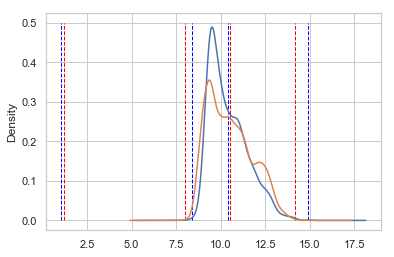

In [11]:
all_wine.groupby('color')['alcohol'].plot(kind='density')

print(all_wine[all_wine['color'] == 'R']['alcohol'].mean())


plt.vlines(all_wine[all_wine['color'] == 'R']['alcohol'].mean(),   
           linewidth=1.0,ymin = 0, linestyles='dashed',
           ymax = 0.5,
           color="blue")


plt.vlines(all_wine[all_wine['color'] == 'R']['alcohol'].min(),   
           linewidth=1.0,ymin = 0, linestyles='dashed',
           ymax = 0.5,
           color="blue")

plt.vlines(all_wine[all_wine['color'] == 'R']['alcohol'].max(),   
           linewidth=1.0,ymin = 0, linestyles='dashed',
           ymax = 0.5,
           color="blue")


plt.vlines(all_wine[all_wine['color'] == 'R']['alcohol'].std(),   
           linewidth=1.0,ymin = 0, linestyles='dashed',
           ymax = 0.5,
           color="blue")

plt.vlines(all_wine[all_wine['color'] == 'W']['alcohol'].mean(),   
           linewidth=1.0,ymin = 0, linestyles='dashed',
           ymax = 0.5,
           color="red")


plt.vlines(all_wine[all_wine['color'] == 'W']['alcohol'].min(),   
           linewidth=1.0,ymin = 0, linestyles='dashed',
           ymax = 0.5,
           color="red")

plt.vlines(all_wine[all_wine['color'] == 'W']['alcohol'].max(),   
           linewidth=1.0,ymin = 0, linestyles='dashed',
           ymax = 0.5,
           color="red")


plt.vlines(all_wine[all_wine['color'] == 'W']['alcohol'].std(),   
           linewidth=1.0,ymin = 0, linestyles='dashed',
           ymax = 0.5,
           color="red")



['alcohol', 'chlorides', 'citric_acid', 'density', 'fixed_acidity', 'free_sulfur_dioxide', 'pH', 'quality', 'residual_sugar', 'sulphates', 'total_sulfur_dioxide', 'volatile_acidity']
alcohol


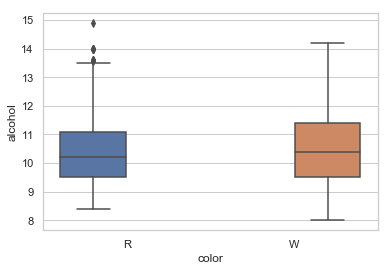

chlorides


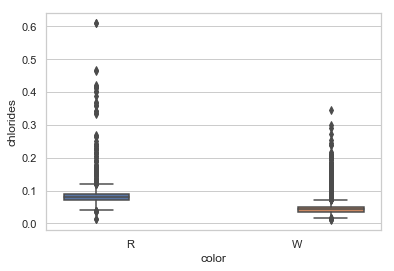

citric_acid


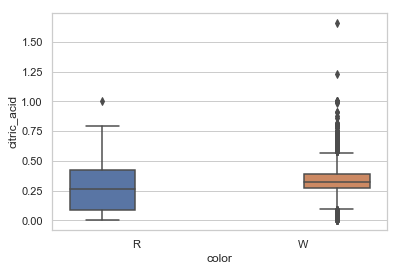

density


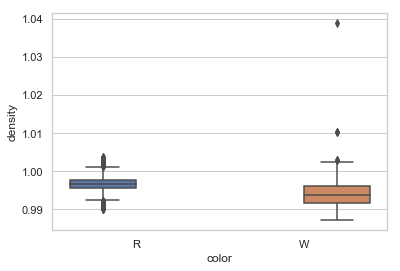

fixed_acidity


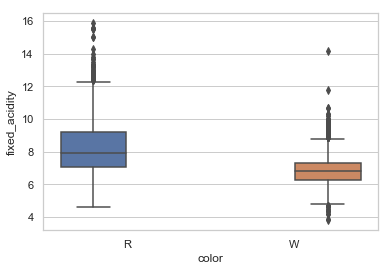

free_sulfur_dioxide


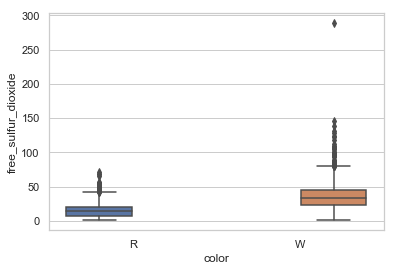

pH


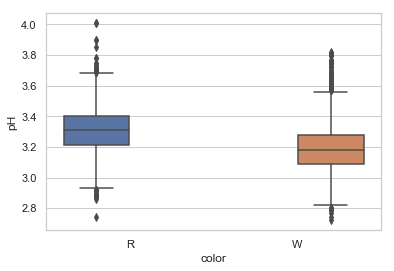

quality


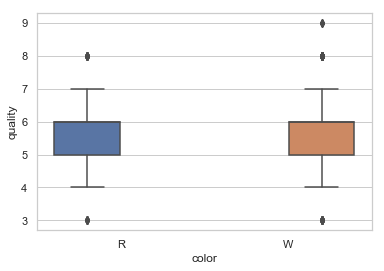

residual_sugar


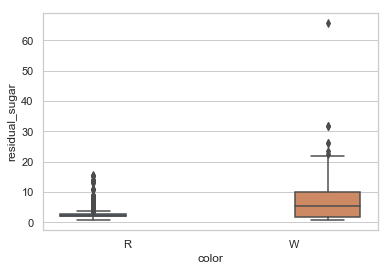

sulphates


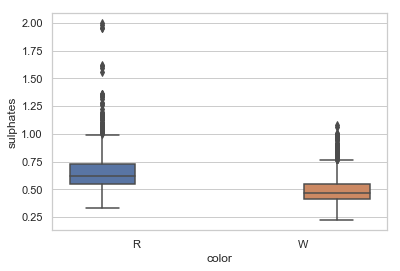

total_sulfur_dioxide


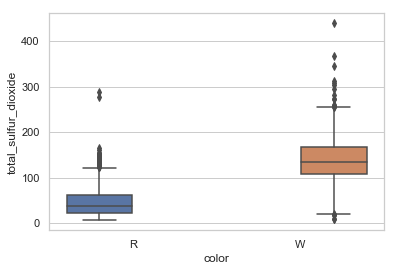

volatile_acidity


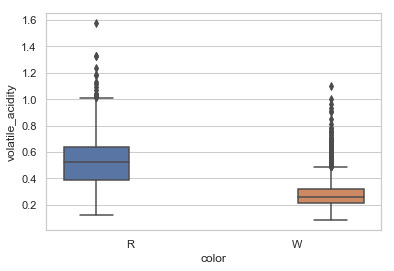

In [12]:
col_names = list(all_wine.columns)
col_names.remove('color')
print(col_names)

for colum in col_names:
    print(colum)
    ax=sns.boxplot(x="color", y=colum, hue="color", data=all_wine)
    ax.legend_.remove()
    plt.show()
    

## [Assignment 2 ] : Write the inferential statement after each visual summary

In [15]:
for colum in col_names:
    if(all_wine[all_wine['color'] == 'R']['alcohol'].mean() > all_wine[all_wine['color'] == 'W']['alcohol'].mean()):
        print('On average, the content of {cl} in red wine is greater than that in white wine'.format(cl=colum))
    elif(all_wine[all_wine['color'] == 'R']['alcohol'].mean() < all_wine[all_wine['color'] == 'W']['alcohol'].mean()):
        print('On average, the content of {cl} in red wine is lesser than that in white wine'.format(cl=colum))
    else:
        print('On average, the content of {cl} in red wine is equal to that in white wine'.format(cl=colum))

On average, the content of alcohol in red wine is lesser than that in white wine
On average, the content of chlorides in red wine is lesser than that in white wine
On average, the content of citric_acid in red wine is lesser than that in white wine
On average, the content of density in red wine is lesser than that in white wine
On average, the content of fixed_acidity in red wine is lesser than that in white wine
On average, the content of free_sulfur_dioxide in red wine is lesser than that in white wine
On average, the content of pH in red wine is lesser than that in white wine
On average, the content of quality in red wine is lesser than that in white wine
On average, the content of residual_sugar in red wine is lesser than that in white wine
On average, the content of sulphates in red wine is lesser than that in white wine
On average, the content of total_sulfur_dioxide in red wine is lesser than that in white wine
On average, the content of volatile_acidity in red wine is lesser th

## [Assignment 3 ] : Try to automate the visual summary and inferential summary using a function

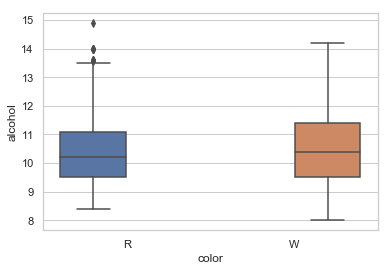

On average, the content of alcohol in red wine is lesser than that in white wine


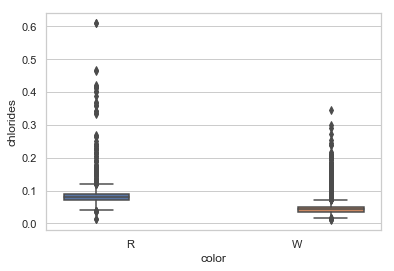

On average, the content of chlorides in red wine is lesser than that in white wine


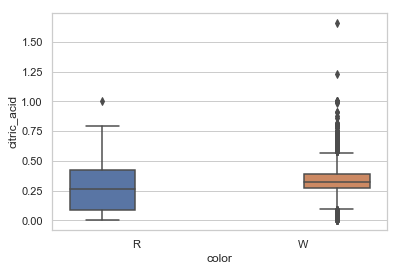

On average, the content of citric_acid in red wine is lesser than that in white wine


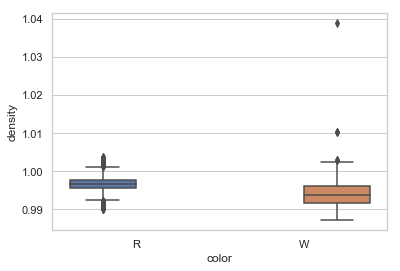

On average, the content of density in red wine is lesser than that in white wine


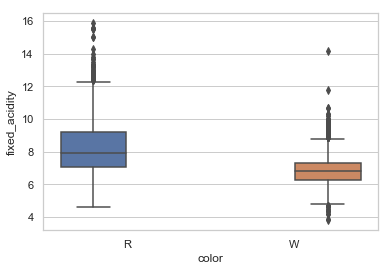

On average, the content of fixed_acidity in red wine is lesser than that in white wine


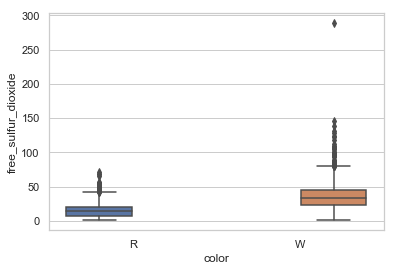

On average, the content of free_sulfur_dioxide in red wine is lesser than that in white wine


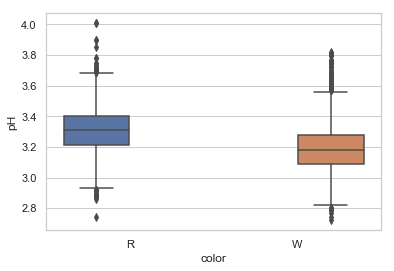

On average, the content of pH in red wine is lesser than that in white wine


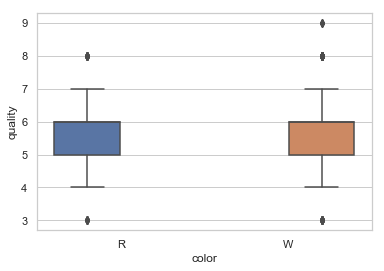

On average, the content of quality in red wine is lesser than that in white wine


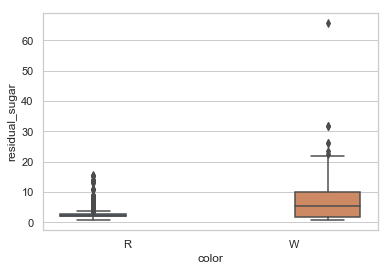

On average, the content of residual_sugar in red wine is lesser than that in white wine


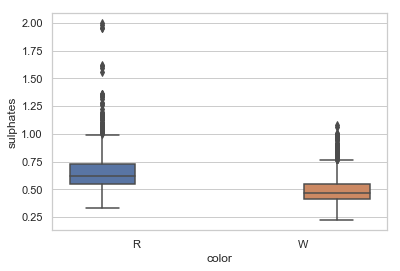

On average, the content of sulphates in red wine is lesser than that in white wine


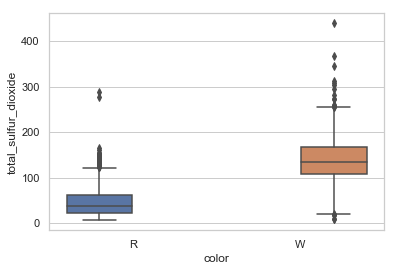

On average, the content of total_sulfur_dioxide in red wine is lesser than that in white wine


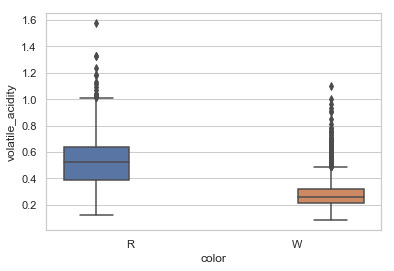

On average, the content of volatile_acidity in red wine is lesser than that in white wine


In [18]:
def generate_automated_summary(data_set):
    col_names = list(data_set.columns)
    col_names.remove('color')

    for colum in col_names:
        ax=sns.boxplot(x="color", y=colum, hue="color", data=all_wine)
        ax.legend_.remove()
        plt.show()
        
        if(all_wine[all_wine['color'] == 'R']['alcohol'].mean() > all_wine[all_wine['color'] == 'W']['alcohol'].mean()):
            print('On average, the content of {cl} in red wine is greater than that in white wine'.format(cl=colum))
        elif(all_wine[all_wine['color'] == 'R']['alcohol'].mean() < all_wine[all_wine['color'] == 'W']['alcohol'].mean()):
            print('On average, the content of {cl} in red wine is lesser than that in white wine'.format(cl=colum))
        else:
            print('On average, the content of {cl} in red wine is equal to that in white wine'.format(cl=colum))

generate_automated_summary(all_wine)            

## Check relationship between the predictor variables


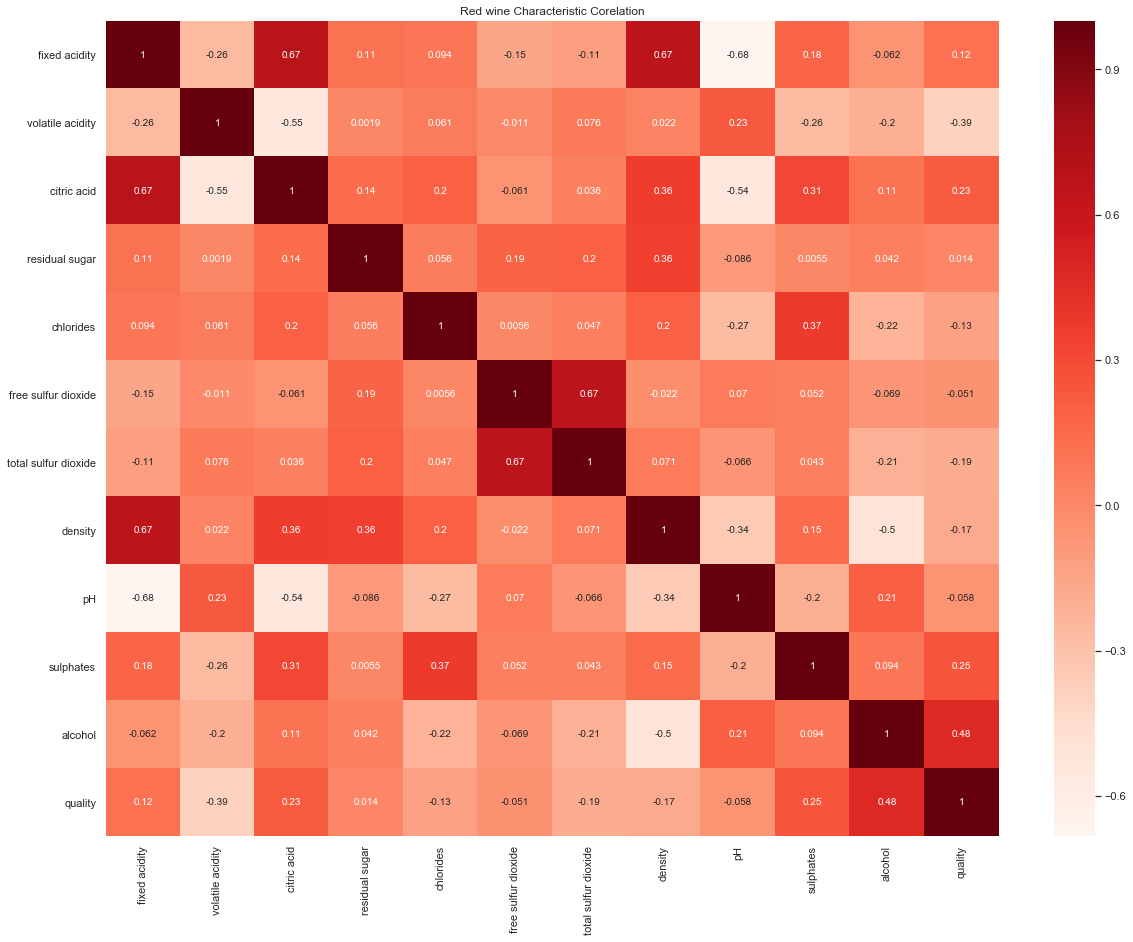

In [13]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Red wine Characteristic Corelation")
corr = red_wine.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Reds",annot=True)
plt.show()

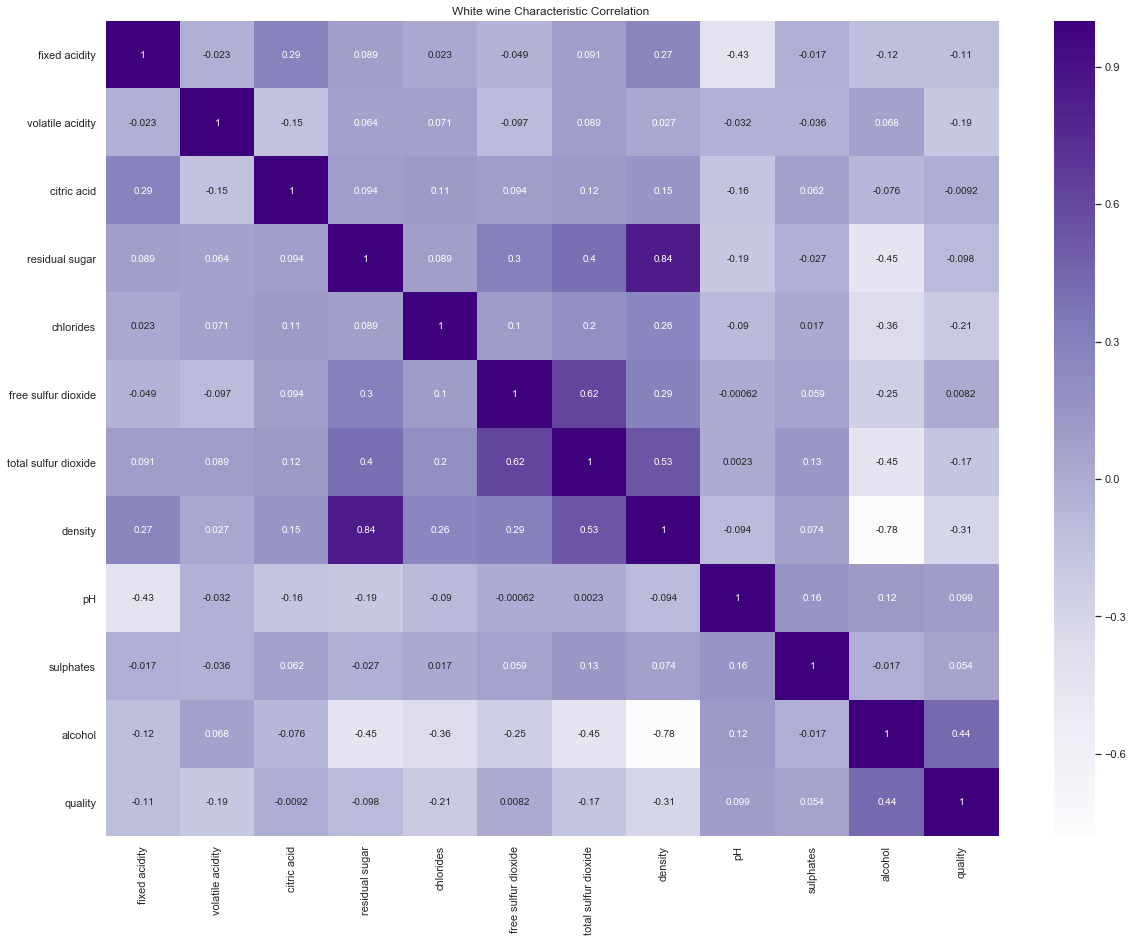

In [14]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("White wine Characteristic Correlation ")
corr = white_wine.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Purples",annot=True)